<a href="https://colab.research.google.com/github/rosslogan702/hypothesis_testing_notes/blob/master/2_sample_z_test_proportion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **What is a Standard Normal Distribution?**

####Definition

The standard normal distribution is a special case of the normal distribution. 
It is the distribution that occurs when a normal random variable has a mean of 
zero and a standard deviation of 1.

### **Standard Score (Z-Score)**

The normal random variable of a standard normal distribution is called a standard score or z-score.

Every normal random variable can be transformed into a z-score using the following formula:

$z = (X-\mu)/\sigma$


Where X is the normal random variable, $\mu$ is the mean of X and $\sigma$ is the standard deviation of X.

A Z-Score measures exactly how many standard deviations aboe or below the mean a data point is.

### **2 Sample Z-Test of Proportions**

A 2 sample Z-test of proportions allows you to compare two proportions to determine if there is a difference between them.

####**Sample Question - Manual Calculation Example 1**

A pharmaceutical study is testing two new treatments for the flu, drug A and drug B.

Drug A works on 41 people out of a sample of 195. Drug B works on 351 people out of a sample of 605. Are the two drugs comparable?

### **Step 1 - Define Null and Alternative Hypothesis**

$H_0$: The proportions of people that Drug A and Drug B work on are the same.

$H_A$: The proportions of people that Drug A and Drug B work on are not the same

Test at the significance level of 0.05

$\alpha$ = 0.05

### **Step 2 - Find the two proportions & overall sample proportion**

In [0]:
drug_a_sample_size = 195
drug_a_works = 41

drug_b_sample_size = 605
drug_b_works = 351

p1 = drug_a_works/drug_a_sample_size
p2 = drug_b_works/drug_b_sample_size

print('Proportion of people drug A works on, p1: {}'.format(p1))
print('Proportion of people drug b works on, p2: {}'.format(p2))

p = (drug_a_works + drug_b_works)/(drug_a_sample_size + drug_b_sample_size)
print('Overall sample proportion, p: {}'.format(p))

Proportion of people drug A works on, p1: 0.21025641025641026
Proportion of people drug b works on, p2: 0.5801652892561984
Overall sample proportion, p: 0.49


### **Step 3 - Calculate the Test Statistic**

$z\text{-}statistic = \frac{(\hat{p_2} - \hat{p_1})-0}{\sqrt{{\hat{p}(1-{\hat{p})}}({\dfrac{1}{n_1} + \dfrac{1}{n_2}})}}$

In [0]:
import numpy as np

z_statistic = (p2-p1)/(np.sqrt((p*(1-p)*((1/drug_a_sample_size) + (1/drug_b_sample_size)))))

print(z_statistic)

8.985900954503084


### **Step 4 - Find the Z-Score Value**

We now need to determine if the z_statistic value falls into the rejection region. To do this we look up the z score value for the alpha/2 value.

The z-score associated with 0.05/2 value is 1.96

Z table: https://www.statisticshowto.datasciencecentral.com/tables/z-table/

### **Step 5 - Compare the calculated z-score to the critical value from z-table**

If the calculate z-statistic value is greater than the z-score from the z-table then we can reject the null hypothesis and favour the alternative hypothesis.

In [0]:
z_table_score = 1.96

if z_table_score < z_statistic:
  print('Z statistic > Z table score, reject the null hypothesis')
else:
  print('Z statistic < Z table score, failed to reject the null hypothesis')

Z statistic > Z table score, reject the null hypothesis


### **Alternate method using Statsmodels (python lib)**

Rather than doing the above calculation manually, there are python libraries we can use to perform the calculation for us.

This is shown below.

In [0]:
from statsmodels.stats.proportion import proportions_ztest

In [0]:
counts = np.array([41, 351])
nobs = np.array([195, 605])
stat, pval = proportions_ztest(counts, nobs)

print('Z Statistic: {0:0.3f}'.format(stat))
print('P-Value: {0:0.3f}'.format(pval))

if pval < 0.05:
  print('Reject the null hypothesis')
else:
  print('Failed to reject the null hypothesis')

Z Statistic: -8.986
P-Value: 0.000
Reject the null hypothesis


#### **Sample Example 2 (Confidence Interval & Hypothesis Test)** 

**Question:**

There is an upcoming election and we want to find out if there is a meaningful difference between the number of men and the number of women who vote for a candidate.

A survey is conducted of 1000 men and 1000 women are likely to vote and the results are recorded. The results from the survey show that 642 men indicate that they will vote for the candidate and 591 women will vote for the candidate. 

Calculate a 95% confidence interval estimate for the difference between the number of men who say they will vote for a candidate and the number of women who say they will vote for the candidate.

The true population proportions are not known.

Also run a hypothesis test at a significance level of 5%


#### **Step 1 - Calculate Sample Proportions & Sample Proportion Difference**

The first step is to calculate the sample proportions from the survey and the sample proportion difference.

Let $p_1$ represent the proportion of men who vote for the candidate.  
Let $p_2$ represent the proportion of women who vote for the candidate.

Since our sample size is large, we can use this as an estimate for the true population proportion difference for the formulas and calculations that follow.

In [0]:
p1 = 642/1000
p2 = 591/1000
print('Sample proportion of men (p1) who will vote for the candidate: {}'.format(p1))
print('Sample proportion of women (p2) who will vote for the candidate: {}'.format(p2))
print('Sample proportion diff (p1-p2): {:.3f}'.format(p1-p2))

Sample proportion of men (p1) who will vote for the candidate: 0.642
Sample proportion of women (p2) who will vote for the candidate: 0.591
Sample proportion diff (p1-p2): 0.051


As we have a large sample size and because the proportions that we are dealing with are not close to zero or one, the sampling distributions will be approximately normal.

Subtracting $p_1$ and $p_2$ is like taking a sample from the sampling distribution of the difference in proportions.

The distribution that we are interested in thinking about is the sampling distribution of the difference in proportions.

##### **Show P1 and P2 Sampling Distributions**

P1 Sampling Dist, mean: 0.642, std_dev: 0.015
P2 Sampling Dist, mean: 0.591, std_dev: 0.016


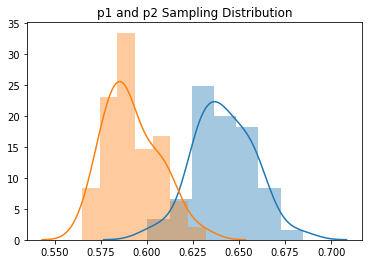

In [0]:
import numpy as np
import seaborn as sns

p1_mean = 0.642
p2_mean = 0.591

p1_std_dev = np.sqrt((p1*(1-p1)/1000))
p2_std_dev = np.sqrt((p2*(1-p2)/1000))

print('P1 Sampling Dist, mean: {:.3f}, std_dev: {:.3f}'.format(p1_mean, p1_std_dev))
print('P2 Sampling Dist, mean: {:.3f}, std_dev: {:.3f}'.format(p2_mean, p2_std_dev))

p1_sample_dist = np.random.normal(loc=p1_mean, scale=p1_std_dev, size=50)
p2_sample_dist = np.random.normal(loc=p2_mean, scale=p2_std_dev, size=50)

ax_p1 = sns.distplot(p1_sample_dist)
ax_p1.set_title('p1 and p2 Sampling Distribution')

ax_p2 = sns.distplot(p2_sample_dist)

##### **Show Sampling Distribution of P1 - P2 (Sampling Distribution of Difference in Proportions)**

Text(0.5, 1.0, 'p1 - p2 Sampling Distribution')

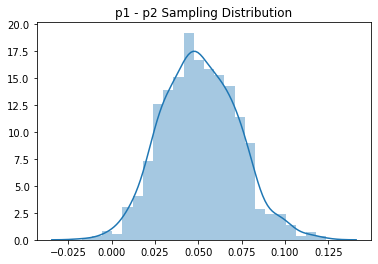

In [0]:
p1_p2_sample_dist = np.subtract(p1_sample_dist, p2_sample_dist)

ax_p1_p2 = sns.distplot(p1_p2_sample_dist)
ax_p1_p2.set_title('p1 - p2 Sampling Distribution')

####**Step 2 - Calculate the number of standard deviations away from the mean we require to contain 95% of values of $p_1$ - $p_2$**

When calculating the 95% confidence interval, what we want is that there is a 95% chance that the true mean or true value of p1 - p2 is within say d (for distance) of 0.051

This is the same as saying there is a 95% chance that 0.051 is within d of this actual parameter (p1-p2).

So what we need to figure out is what distance around the value of p1-p2, where if we were to take a random sample from the (p1-p2) distribution, it has a 95% chance of being within d of this value.

Our confidence interval will look something like: 0.051 +- d

Since the Z-table, gives the cumulative distribution if we are interested in containing 95% of the values and since we are intersted in both tails the value we are looking for is 97.5% (0.975).

If we then apply this 97.5% value to both sides, then we will have the 95% confidence interval.

Looking up the Z-table this gives the value 1.96.

A distribution showing this is below along with how to calculate this using python rather than a manual look up in the Z-Table.

Text(-1.0, 0.2, '95% of data')

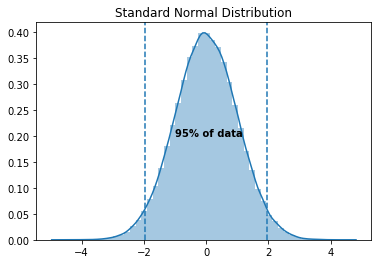

In [0]:
stand_norm_dist = np.random.normal(loc=0, scale=1.0, size=100000)
ax_stand_norm = sns.distplot(stand_norm_dist)
ax_stand_norm.set_title('Standard Normal Distribution')
ax_stand_norm.axvline(1.96, 0, 1, ls='--')
ax_stand_norm.axvline(-1.96, 0, 1, ls='--')
ax_stand_norm.text(-1.0, 0.2, "95% of data", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [0]:
from scipy.stats import norm
num_std_deviations = norm.ppf(0.975)
print('Number of standard deviations required to contain 95% of values: {:.2f}'.format(num_std_deviations))

Number of standard deviations required to contain 95% of values: 1.96


#### **Step 3 - Calculate the standard deviation of the $p_1$ - $p_2$ sampling distribution**

To find the standard deviation of the sampling distribution of $p_1$ - $p_2$, we add the variances of the individual sampling distributions for $p_1$ and $p_2$ and then take the square root.

The $p_1$ and $p_2$ are bernoulli distributions so we know that the variance can be calculated by p(1-p).

For more details: https://en.wikipedia.org/wiki/Bernoulli_distribution

$\sigma = \sqrt{\frac{p_1(1-p_1)}{1000} + \frac{p_2(1-p_2)}{1000}}$   


In [0]:
import numpy as np
sigma = np.sqrt((p1*(1-p1)/1000) + (p2*(1-p2)/1000))
print('Standard deviation of p1 - p2: {:.3f}'.format(sigma))

Standard deviation of p1 - p2: 0.022


#### **Step 4 - Calculate the value d, distance from $p_1$ - $p_2$**

To calculate the distance d for the 95% confidence interval, we take the number of standard deviations away from the mean required to contain 95% of the values and multiply it by the standard deviation of the sampling distribution of $p_1$ - $p_2$

In [0]:
d = num_std_deviations * sigma
print('d: {:.3f}'.format(d))

d: 0.043


#### **Step 5 - Calculate the confidence interval**

The 95% confidence interval can now be calculated.

$p_1$ - $p_2$ = 0.642 - 0.591 = 0.051

0.051 $\pm$ d

In [0]:
confidence_interval_lower = 0.051 - d
confidence_interval_upper = 0.051 + d

print('95% confidence interval for difference in proportions is: {:.3f}, {:.3f}'.format(confidence_interval_lower, confidence_interval_upper))

95% confidence interval for difference in proportions is: 0.008, 0.094


So we are confident that there's a 95% chance that men are more likely to vote for the candidate than women.

#### **Hypothesis Test**

In [0]:
counts = np.array([642, 591])
nobs = np.array([1000, 1000])
stat, pval = proportions_ztest(counts, nobs)

print('Z Statistic: {0:0.3f}'.format(stat))
print('P-Value: {0:0.3f}'.format(pval))

if pval < 0.05:
  print('Reject the null hypothesis, there is a meaningful difference')
else:
  print('Failed to reject the null hypothesis, no meaningful difference detected')

Z Statistic: 2.345
P-Value: 0.019
Reject the null hypothesis, there is a meaningful difference


In [0]:
%load_ext rpy2.ipython

In [0]:
%%R
x <- 42
print(x)

[1] 42


### **References**

[0] https://stattrek.com/probability-distributions/standard-normal.aspx?Tutorial=AP  
[1] https://www.statisticshowto.datasciencecentral.com/z-test/  

[2] https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html  